#Customer Segmentation using K-Means Clustering 

Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To get the dataset from CSV file

df = pd.read_csv('/content/drive/MyDrive/Projects/ML PROJECT/Customer Segmentation using K-Means Clustering /Mall_Customers.csv')

#To show the starting first 5 data 

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Finding Numbers of Rows and Columns 

df.shape

(200, 5)

In [4]:
#Getting Information about Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
#To check for Null values in dataset

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
#To recheck for Null values

df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

NOTE: Here given data doesn't contain Null Values 

In [7]:
X = df.iloc[: , [3,4]].values

print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [8]:
#How many clusters K in given dataset 
#call class KMeans inbuilt call

from sklearn.cluster import KMeans                #KMeans inbuilt class


In [9]:
#Elbow Method : - use : How many clusters K in this dataset 
k_rng=range(1,21) #start=1 and stop=21-1=20
#Declare Empty List for SSE
SSE=[] 
#Declare Empty List for K 
k_cluster=[]
for k in k_rng:
    #create object of KMeans class
    km=KMeans(n_clusters=k) #first time k=1 then k=2 .....
    #We train the model use fit() method
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
     ##inertia_ inbuilt method of Kmeans class which calculate the sum of 
        #squared error
    #formula of SSE=sum(centerpoint-datapoint)^2
    SSE.append(km.inertia_)
    k_cluster.append(k)

In [10]:
#create a dict

dic={'K' :k_cluster, 'SSE' :SSE }
#convert dataframe
df1=pd.DataFrame(dic)
df1

,K,SSE
0,1,269981.280000
1,2,181363.595960
2,3,106348.373062
3,4,73679.789039
4,5,44448.455448
5,6,37265.865205
6,7,30259.657207
7,8,25022.485005
8,9,22143.222101
9,10,19738.018809


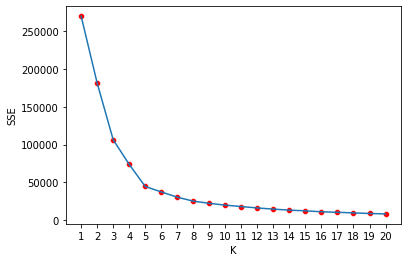

In [11]:
#Visualize 

X=df1["K"]

#lineplot between K and SSE
sns.lineplot(data=df1,x="K",y="SSE")

#scatterplot between K and SSE
sns.scatterplot(data=df1,x="K",y="SSE",color="Red")
plt.xticks(X)
plt.show()

Clear no. of cluster=5 to see above visualisation in this dataset

In [12]:
#create object of KMean class and passing the value of no.of clusters=5

km=KMeans(n_clusters=5, init="k-means++", random_state=1)

In [13]:
Y_pred=km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [14]:
Y_pred

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [15]:
#To add Y_pred column in existing dataset

df['Target']=Y_pred
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


In [16]:
df0=df[df['Target']==0]
df1=df[df['Target']==1]
df2=df[df['Target']==2]
df3=df[df['Target']==3]
df4=df[df['Target']==4]

In [17]:
df0

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0
11,12,Female,35,19,99,0
13,14,Female,24,20,77,0
15,16,Male,22,20,79,0
17,18,Male,20,21,66,0
19,20,Female,35,23,98,0


In [18]:
df1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
124,125,Female,23,70,29,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
134,135,Male,20,73,5,1
136,137,Female,44,73,7,1
138,139,Male,19,74,10,1
140,141,Female,57,75,5,1
144,145,Male,25,77,12,1
146,147,Male,48,77,36,1
148,149,Female,34,78,22,1


In [19]:
df0.shape

(22, 6)

In [20]:
df1.shape

(35, 6)

In [21]:
#find the cemtriod value of each cluster , use inbuilt method cluster_centers_
#which is define in Kmeans class

km.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

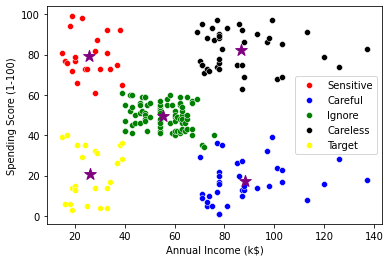

In [22]:
#Visualise 

sns.scatterplot(data=df0,x="Annual Income (k$)",y="Spending Score (1-100)",color="red",label="Sensitive")
sns.scatterplot(data=df1,x="Annual Income (k$)",y="Spending Score (1-100)",color="blue",label="Careful")
sns.scatterplot(data=df2,x="Annual Income (k$)",y="Spending Score (1-100)",color="green",label="Ignore")
sns.scatterplot(data=df3,x="Annual Income (k$)",y="Spending Score (1-100)",color="black",label="Careless")
sns.scatterplot(data=df4,x="Annual Income (k$)",y="Spending Score (1-100)",color="yellow",label="Target")

#Show centriod of cluster in plot

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple", marker="*",s=150)
plt.show()

Now Unsupervised data is converted into Supervised. Now apply Classification Supervised Algorithms

In [24]:
#select Input and output
X=df[['Annual Income (k$)','Spending Score (1-100)']]        #Input
Y=df['Target']                                             #Output

In [25]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
#Create user defined function

def create_model(model): #here model passing argument(object)
    model.fit(X_train,Y_train)#train the model with 70%data
    #to test the model with 30% data
    Y_pred=model.predict(X_test)
    #to generate report and confusion matrix
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
#Baseline model with Logistic Regression

from sklearn.linear_model import LogisticRegression
#Create a object of LogisticRegression
lr=LogisticRegression()
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.91      0.95        11
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        11
           4       1.00      0.89      0.94         9

    accuracy                           0.95        60
   macro avg       0.97      0.93      0.95        60
weighted avg       0.96      0.95      0.95        60

[[ 7  0  1  0  0]
 [ 0 10  1  0  0]
 [ 0  0 21  0  0]
 [ 0  0  0 11  0]
 [ 0  0  1  0  8]]
